## 22. Sínussveiflur

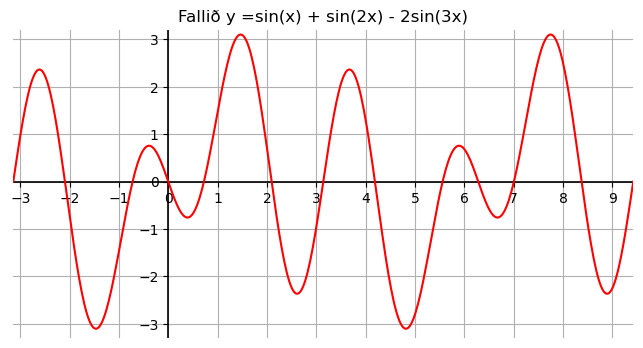

In [228]:
from math import sin, pi
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
def f(x):
    return sin(x) +  sin(2*x)-2*sin(3*x)
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.xlim([-pi, 3*pi])
plt.ylim([-3.3, 3.2])
plt.xticks(np.arange(-3,10,1))
plt.yticks(np.arange(-3,3.1,1))
plt.axvline(lw=1.2, c='k')
plt.axhline(lw=1.2, c='k')
plt.grid(True)
plt.box(False)
x=np.linspace(-pi,3*pi,500)
y=[f(xi) for xi in x]
bspline = interpolate.make_interp_spline(x, y)
y_new = bspline(x)
plt.title("Fallið y =sin(x) + sin(2x) - 2sin(3x)")

plt.plot(x,y, c='r')

plt.show()

## 23. Málmavinnsla

### 1.

In [545]:
def number(k):
    if k%2==0:
        return int((((k+1)*(k+2)*(k+3))/6)+(k/2-1))
    else:
        return int((((k+1)*(k+2)*(k+3))/6)-2)
print("k          Noble gas")
for i in range(1,8):
    print(f"{i:<10} {number(i)}")

k          Noble gas
1          2
2          10
3          18
4          36
5          54
6          86
7          118


### 2.

In [558]:
def lota(s):
    if s>118:
        raise ValueError("Last element on the periodic table is Oganesson with the element number 118.")
    k = 0
    while s > number(k):
        k += 1
    return k

def flokkur(y):
    if y == 1:
        return 1
    elif 1 < y <= number(lota(y)-1)+2:
        return y - number(lota(y)-1)
    else:
        return max(3,18 + y - number(lota(y)))

print("Frumefni     Flokkur     Lota")
for i in range(10,111,10):
    print(str(i).ljust(14), str(flokkur(i)).ljust(11), str(lota(i)))



4
Frumefni     Flokkur     Lota
10             18          2
20             2           4
30             12          4
40             4           5
50             14          5
60             3           6
70             3           6
80             12          6
90             3           7
100            3           7
110            10          7


### 3.

In [350]:
def íslenska(s):
    """notað sem 'key' í sort eða sorted til að raða í íslenska stafrófsröð,
    t.d. print(sorted(['ár','bára','bali','akur'], key=íslenska))"""
    return [íslenska.k.get(c.lower(),0) for c in s]
íslenska.a = list('0123456789aábcdðeéfghiíjklmnoópqrstuúvwxyýzþæö')
íslenska.k = dict(zip(íslenska.a, range(1,len(íslenska.a)+1)))


file = "https://cs.hi.is/python/allir-malmar.txt"
(x,y,z,a,b,c) = np.loadtxt(file, dtype=str, delimiter=";", skiprows=1).T

Edlisthyng = np.char.replace(a, ',', '.')
Edlisthyngd = Edlisthyng.astype(float)
Takn = x.astype(str)
Malmur = y.astype(str)
Saetistala = z.astype(int)
Braedslumark = b.astype(int)
Enska = c.astype(str)

SortedList = sorted(Dictionary,key=íslenska)
SortedDict = {i: Dictionary[i] for i in SortedList}

print("Íslenska      Enska")
for i in SortedDict:
    print (i.capitalize().ljust(12), SortedDict[i])


Íslenska      Enska
Aktín        Actinium
Ál           Aluminum
Barín        Barium
Beryllín     Beryllium
Bismút       Bismuth
Blý          Lead
Dysprósín    Dysprosium
Erbín        Erbium
Evrópín      Europium
Fransín      Francium
Gadólín      Gadolinium
Gallín       Gallium
Gull         Gold
Hafnín       Hafnium
Hólmín       Holmium
Indín        Indium
Iridín       Iridium
Járn         Iron
Kadmín       Cadmium
Kalín        Potassium
Kalsín       Calcium
Kopar        Copper
Kóbalt       Cobalt
Króm         Chromium
Kvikasilfur  Mercury
Lantan       Lanthanum
Litín        Lithium
Lútetín      Lutetium
Magnesín     Magnesium
Mangan       Manganese
Mólýbden     Molybdenum
Natrín       Sodium
Neódým       Neodymium
Neptún       Neptunium
Nikkel       Nickel
Níóbín       Niobium
Osmín        Osmium
Palladín     Palladium
Platína      Platinum
Plúton       Plutonium
Pólon        Polonium
Praseódým    Praseodymium
Prometín     Promethium
Prótaktín    Protactinium
Radín        Radium
Renín

### 4.

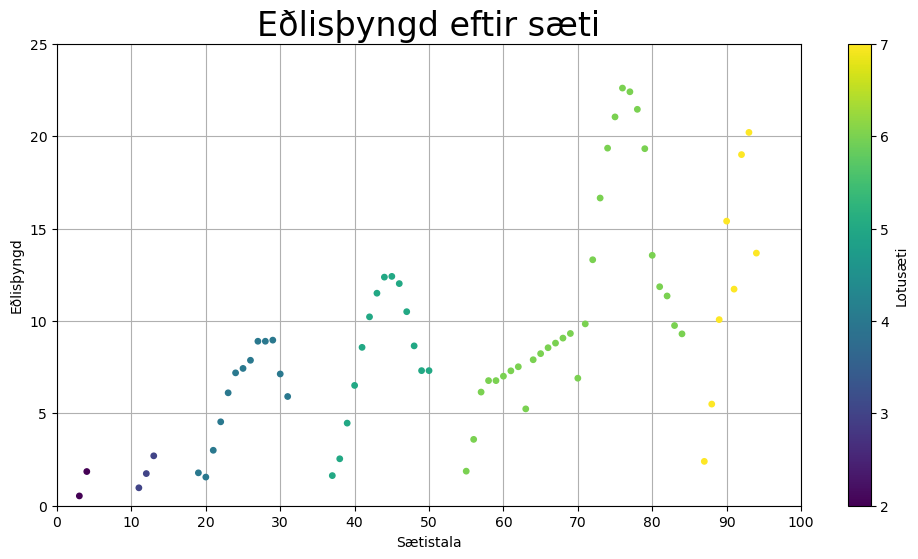

In [573]:
import matplotlib.pyplot as plt
Saeti = [lota(i) for i in Saetistala]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlim(0,100)
plt.ylim(0,25)
plt.xticks(np.arange(0,101, 10))
plt.xlabel('Sætistala')
plt.ylabel('Eðlisþyngd')
plt.title("Eðlisþyngd eftir sæti", size=24)
plt.scatter(Saetistala, Edlisthyngd, c=Saeti, zorder=3, s=15)
plt.colorbar(label="Lotusæti")
plt.show()

### 5.

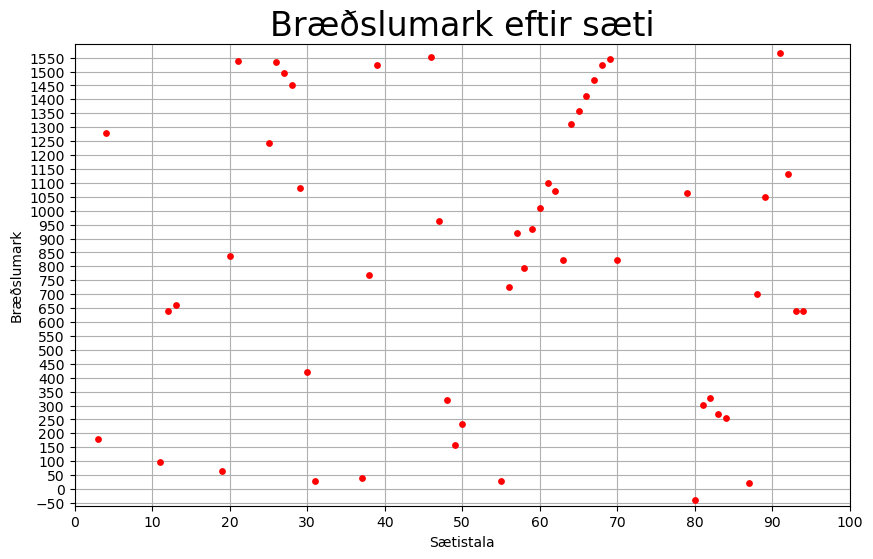

In [310]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlim(0,100)
plt.ylim(-60,1600)
plt.xticks(np.arange(0,101, 10))
plt.xlabel('Sætistala')
plt.ylabel('Bræðslumark')
plt.yticks(np.arange(-50, 1600, 50))
plt.title("Bræðslumark eftir sæti", size=24)
plt.scatter(Saetistala, Braedslumark, zorder=3, s=15, c="r")
plt.show()

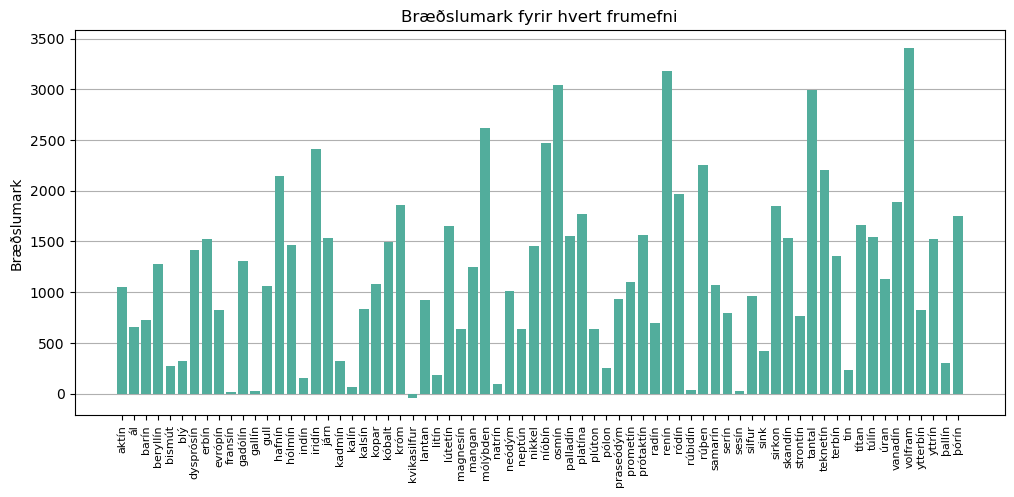

In [343]:
Dictionary = dict(zip(Malmur,Enska))
BraedsluNafn = dict(zip(Malmur, Braedslumark))

SortedList = sorted(BraedsluNafn, key=íslenska)
SortedDict = {i: BraedsluNafn[i] for i in SortedList}

plt.figure(figsize=(12,5))
plt.grid(True, axis='y')
plt.bar(SortedList, SortedDict.values(), color='#52ad9c', linewidth=0.6, zorder=3)
plt.xticks(rotation=90, size=8)
plt.ylabel('Bræðslumark')
plt.title('Bræðslumark fyrir hvert frumefni')
plt.show()